In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [6]:
# Read in data
df = pd.read_csv('dataset.csv')
print(df.shape)
df = df.head(1500)
print(df.shape)

(46443, 8)
(1500, 8)


In [3]:
df.head()

,Core_Series,Generation,Model,Rating,Date,Location,Reviews,Sentiment
0,i7,97,Core i7-9700K,5.0,2019-07-16,India,Pure beast chip.upgrade 8700k to 9700k.also go...,1
1,i7,12,Core i7-12700K Desktop,5.0,2022-03-29,India,I have paired this processor with Asus Prime Z...,1
2,i3,10,Core i3-10100,5.0,2021-05-22,India,Very safe packaging and good performance,1
3,i5,11,Core i5-11600KF Desktop,4.0,2022-11-19,the United States,Was able to snag this for about $150 before ta...,1
4,i3,12,Core i3 12100F 12th Gen Generation Desktop PC,1.0,2023-04-26,India,Cpu stock cooler fan got broken with 1 blade i...,0


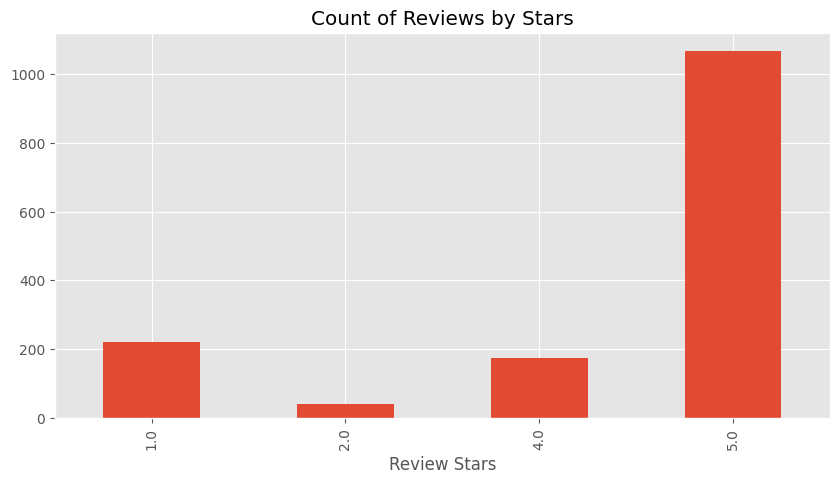

In [7]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
# NLTK Basics

In [8]:
example = df['Reviews'][50]
print(example)

Its A Beast of a processor.


In [9]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Its', 'A', 'Beast', 'of', 'a', 'processor', '.']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Its', 'PRP$'),
 ('A', 'DT'),
 ('Beast', 'NNP'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('processor', 'NN'),
 ('.', '.')]

In [11]:
import nltk
print(nltk.data.path)


['C:\\Users\\Lenovo/nltk_data', 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'C:\\Users\\Lenovo\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\Lenovo\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [12]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S Its/PRP$ A/DT Beast/NNP of/IN a/DT processor/NN ./.)


In [ ]:
# VADER MODEL

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [16]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [17]:
df

,Core_Series,Generation,Model,Rating,Date,Location,Reviews,Sentiment
0,i7,97,Core i7-9700K,5.0,2019-07-16,India,Pure beast chip.upgrade 8700k to 9700k.also go...,1
1,i7,12,Core i7-12700K Desktop,5.0,2022-03-29,India,I have paired this processor with Asus Prime Z...,1
2,i3,10,Core i3-10100,5.0,2021-05-22,India,Very safe packaging and good performance,1
3,i5,11,Core i5-11600KF Desktop,4.0,2022-11-19,the United States,Was able to snag this for about $150 before ta...,1
4,i3,12,Core i3 12100F 12th Gen Generation Desktop PC,1.0,2023-04-26,India,Cpu stock cooler fan got broken with 1 blade i...,0
...,...,...,...,...,...,...,...,...
1495,i9,99,Core™ i9-9900,5.0,2022-02-05,the United States,When you're at 5.0ghz why would you need to ov...,1
1496,i9,13,Core i9-13900K Desktop,2.0,2024-05-13,the Netherlands,It's not Amazon's issue but the processor I bo...,0
1497,i5,11,Core i5-11400 Desktop,5.0,2023-08-23,India,Bought this processor with motherboard ASUS Pr...,1
1498,i7,12,Core i7-12700K Desktop,5.0,2022-06-28,India,"No doubt, 12th gen Intel processors are a marv...",1


In [21]:
ids = range(1, len(df) + 1)
df.insert(0, 'ID', ids) 

In [22]:
df

,ID,Core_Series,Generation,Model,Rating,Date,Location,Reviews,Sentiment
0,1,i7,97,Core i7-9700K,5.0,2019-07-16,India,Pure beast chip.upgrade 8700k to 9700k.also go...,1
1,2,i7,12,Core i7-12700K Desktop,5.0,2022-03-29,India,I have paired this processor with Asus Prime Z...,1
2,3,i3,10,Core i3-10100,5.0,2021-05-22,India,Very safe packaging and good performance,1
3,4,i5,11,Core i5-11600KF Desktop,4.0,2022-11-19,the United States,Was able to snag this for about $150 before ta...,1
4,5,i3,12,Core i3 12100F 12th Gen Generation Desktop PC,1.0,2023-04-26,India,Cpu stock cooler fan got broken with 1 blade i...,0
...,...,...,...,...,...,...,...,...,...
1495,1496,i9,99,Core™ i9-9900,5.0,2022-02-05,the United States,When you're at 5.0ghz why would you need to ov...,1
1496,1497,i9,13,Core i9-13900K Desktop,2.0,2024-05-13,the Netherlands,It's not Amazon's issue but the processor I bo...,0
1497,1498,i5,11,Core i5-11400 Desktop,5.0,2023-08-23,India,Bought this processor with motherboard ASUS Pr...,1
1498,1499,i7,12,Core i7-12700K Desktop,5.0,2022-06-28,India,"No doubt, 12th gen Intel processors are a marv...",1


In [23]:
from tqdm.notebook import tqdm

# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Reviews']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1500 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(res).T

In [29]:
vaders = vaders.reset_index().rename(columns={'index': 'ID'})

In [26]:
vaders.drop(vaders.columns[0], axis=1, inplace=True)

In [31]:
vaders = vaders.merge(df, how='left')

In [32]:
# Now we have sentiment score and metadata
vaders.head()

,ID,neg,neu,pos,compound,Core_Series,Generation,Model,Rating,Date,Location,Reviews,Sentiment
0,0,0.000,0.775,0.225,0.4404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.060,0.812,0.128,0.4404,i7,97.0,Core i7-9700K,5.0,2019-07-16,India,Pure beast chip.upgrade 8700k to 9700k.also go...,1.0
2,2,0.000,0.396,0.604,0.7264,i7,12.0,Core i7-12700K Desktop,5.0,2022-03-29,India,I have paired this processor with Asus Prime Z...,1.0
3,3,0.000,0.946,0.054,0.2716,i3,10.0,Core i3-10100,5.0,2021-05-22,India,Very safe packaging and good performance,1.0
4,4,0.178,0.655,0.168,-0.7102,i5,11.0,Core i5-11600KF Desktop,4.0,2022-11-19,the United States,Was able to snag this for about $150 before ta...,1.0


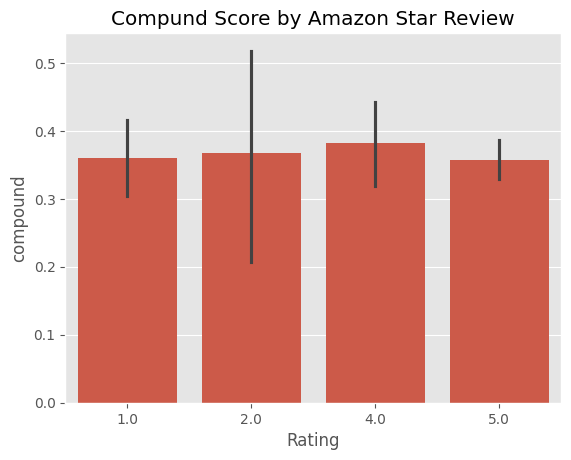

In [33]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

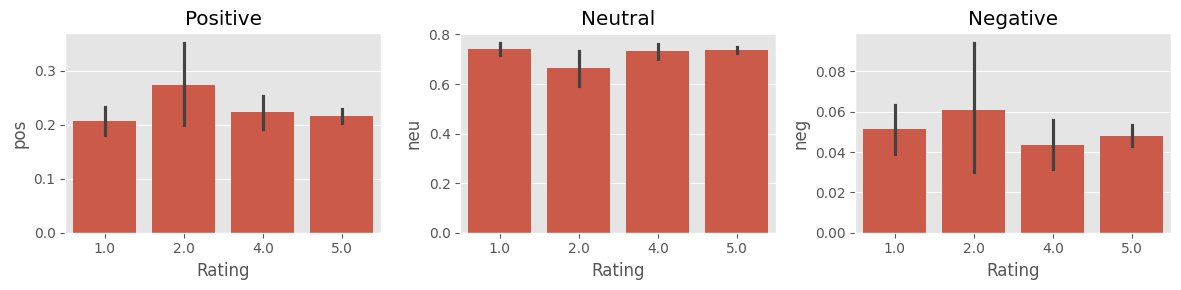

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [ ]:
# Roberta Pretrained Model


In [35]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [48]:
pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [37]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Its A Beast of a processor.


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [40]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [41]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [42]:
print(example)
sia.polarity_scores(example)

Its A Beast of a processor.


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [43]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.262932, 'roberta_neu': 0.6663447, 'roberta_pos': 0.07072329}


In [44]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [45]:
vaders.head()

,ID,neg,neu,pos,compound,Core_Series,Generation,Model,Rating,Date,Location,Reviews,Sentiment
0,0,0.000,0.775,0.225,0.4404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.060,0.812,0.128,0.4404,i7,97.0,Core i7-9700K,5.0,2019-07-16,India,Pure beast chip.upgrade 8700k to 9700k.also go...,1.0
2,2,0.000,0.396,0.604,0.7264,i7,12.0,Core i7-12700K Desktop,5.0,2022-03-29,India,I have paired this processor with Asus Prime Z...,1.0
3,3,0.000,0.946,0.054,0.2716,i3,10.0,Core i3-10100,5.0,2021-05-22,India,Very safe packaging and good performance,1.0
4,4,0.178,0.655,0.168,-0.7102,i5,11.0,Core i5-11600KF Desktop,4.0,2022-11-19,the United States,Was able to snag this for about $150 before ta...,1.0


In [47]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Reviews']
        myid = row['ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1500 [00:00<?, ?it/s]

In [48]:
results_df = pd.DataFrame(res).T

In [50]:
results_df = results_df.reset_index().rename(columns={'index': 'ID'})

In [51]:
results_df = results_df.merge(df, how='left')

In [52]:
results_df

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Core_Series,Generation,Model,Rating,Date,Location,Reviews,Sentiment
0,1,0.000,0.775,0.225,0.4404,0.003832,0.125757,0.870411,i7,97,Core i7-9700K,5.0,2019-07-16,India,Pure beast chip.upgrade 8700k to 9700k.also go...,1
1,2,0.060,0.812,0.128,0.4404,0.016214,0.745332,0.238454,i7,12,Core i7-12700K Desktop,5.0,2022-03-29,India,I have paired this processor with Asus Prime Z...,1
2,3,0.000,0.396,0.604,0.7264,0.003134,0.059539,0.937327,i3,10,Core i3-10100,5.0,2021-05-22,India,Very safe packaging and good performance,1
3,4,0.000,0.946,0.054,0.2716,0.001914,0.214637,0.783449,i5,11,Core i5-11600KF Desktop,4.0,2022-11-19,the United States,Was able to snag this for about $150 before ta...,1
4,5,0.178,0.655,0.168,-0.7102,0.629546,0.312994,0.057460,i3,12,Core i3 12100F 12th Gen Generation Desktop PC,1.0,2023-04-26,India,Cpu stock cooler fan got broken with 1 blade i...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,0.000,0.787,0.213,0.7574,0.010304,0.087689,0.902007,i9,99,Core™ i9-9900,5.0,2022-02-05,the United States,When you're at 5.0ghz why would you need to ov...,1
1496,1497,0.308,0.638,0.054,-0.9073,0.968988,0.027622,0.003390,i9,13,Core i9-13900K Desktop,2.0,2024-05-13,the Netherlands,It's not Amazon's issue but the processor I bo...,0
1497,1498,0.000,1.000,0.000,0.0000,0.020474,0.925502,0.054025,i5,11,Core i5-11400 Desktop,5.0,2023-08-23,India,Bought this processor with motherboard ASUS Pr...,1
1498,1499,0.044,0.836,0.120,0.9368,0.012919,0.120128,0.866953,i7,12,Core i7-12700K Desktop,5.0,2022-06-28,India,"No doubt, 12th gen Intel processors are a marv...",1


In [53]:
results_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Core_Series',
       'Generation', 'Model', 'Rating', 'Date', 'Location', 'Reviews',
       'Sentiment'],
      dtype='object')

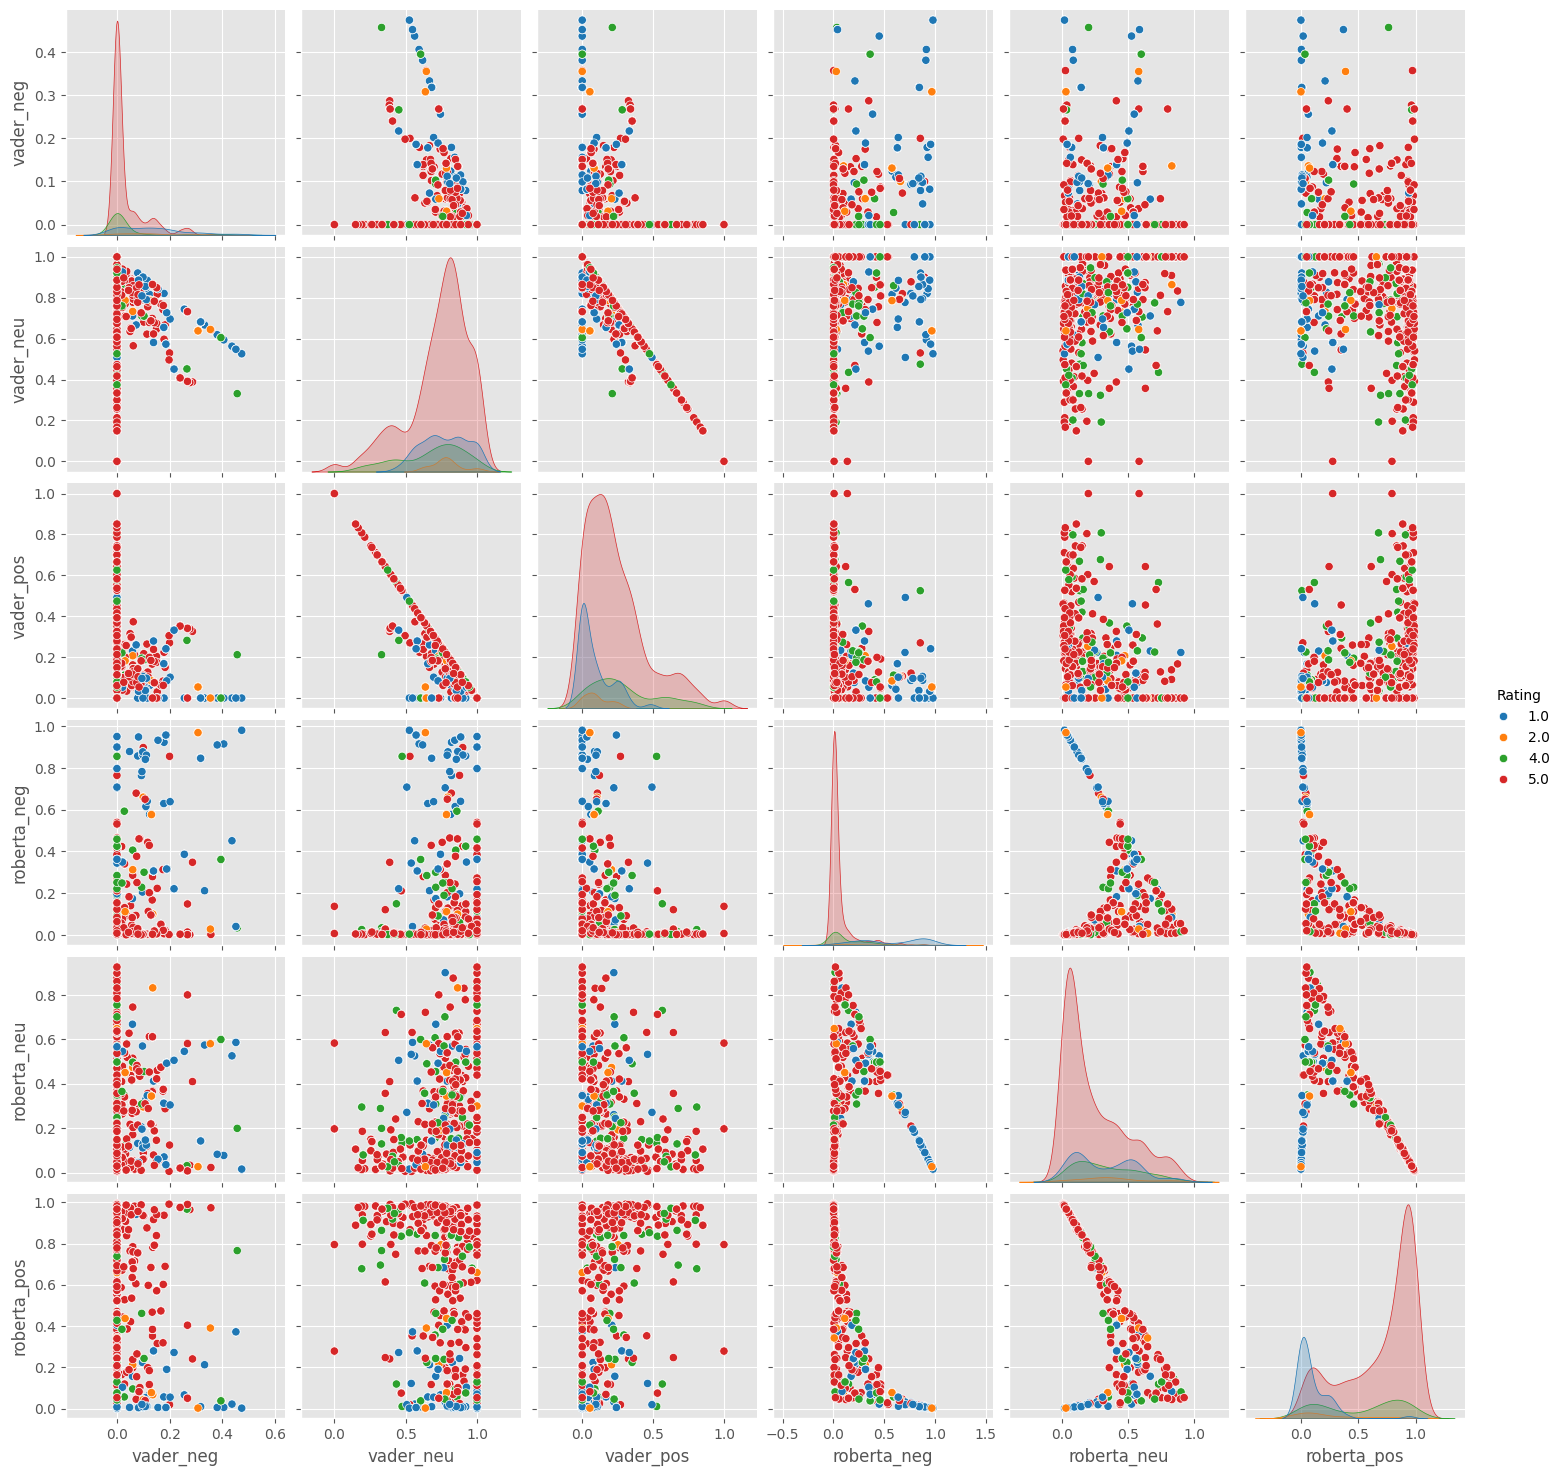

In [54]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

In [57]:
results_df.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Reviews'].values[0]

'Wow, I was So happy after coming home opening this and the CPU itself is missing and the seal was open. Returning right now.'

In [59]:
results_df.query('Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Reviews'].values[0]

'Better not buy it.'

In [60]:
results_df.query('Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Reviews'].values[0]

"Packaging was not at all nice for me 😕 it was just wrapped in paper and then one layer in cardboard using tape and that's it.i mean come on man it is computer's it should be in proper packing no Intel packaging was provided"

In [61]:
results_df.query('Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Reviews'].values[0]

'No regrets on picking this cpu - it ROCKS, go team blue !'

In [63]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [64]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [65]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [73]:
sent_pipeline('The new Intel processor is blazing fast and reliable. It"s a game-changer!')

[{'label': 'POSITIVE', 'score': 0.9997760653495789}]

In [71]:
sent_pipeline('Worst cpu..price is too high and performance')

[{'label': 'NEGATIVE', 'score': 0.9998146891593933}]

In [70]:
sent_pipeline('This cpu is really amazing at everything. It does run very hot so I suggest getting a good AIO or air cooler. 100% would buy again')

[{'label': 'POSITIVE', 'score': 0.9991989731788635}]

In [69]:
sent_pipeline("The Processor is Good & Works Fine. But The Delivery was awful, one of the blades of the fan was broken. As i already had another dedicated cpu cooler, i didn't raise a return. I expected Better from Appario. Apart From this the Processor itself works fine.")

[{'label': 'NEGATIVE', 'score': 0.976942777633667}]

In [66]:
sent_pipeline('Pure beast chip.upgrade 8700k to 9700k.also good pricing by lighting_dealz.thnks amazon..')

[{'label': 'POSITIVE', 'score': 0.9892961382865906}]

In [75]:
import pickle

In [76]:
# Save the pipeline
with open('sent_pipeline_transformers.pkl', 'wb') as f:
    pickle.dump(sent_pipeline, f)

In [77]:
import pickle

# Load the saved pipeline
with open('sent_pipeline_transformers.pkl', 'rb') as f:
    sent_pipeline_loaded = pickle.load(f)

# Test the loaded pipeline
review = "This product is really great!"
result = sent_pipeline_loaded(review)
print(result)


[{'label': 'POSITIVE', 'score': 0.9998753070831299}]
